In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
os.environ["OMP_NUM_THREADS"] = "100"
plt.style.use("/afs/ihep.ac.cn/users/f/fuys/.config/matplotlib/Paper.mplstyle")

In [66]:
##  room, neg 30
# file_name = 'neg106'
# file_name = 'neg90'
# file_name = 'neg60'
file_name = 'neg0'
# file_name = 'room'
data = pd.read_csv("/dybfs2/nEXO/fuys/data/aslc_data/0205_layer4/C3%s-T-240205-3hall00000.csv"%file_name,skiprows=4,usecols=["Ampl"]) # mv


In [67]:
package_len = 10000
print(len(data)/(33*package_len))

48.484854545454546


In [68]:
# plt.plot(range(len(data)), data)

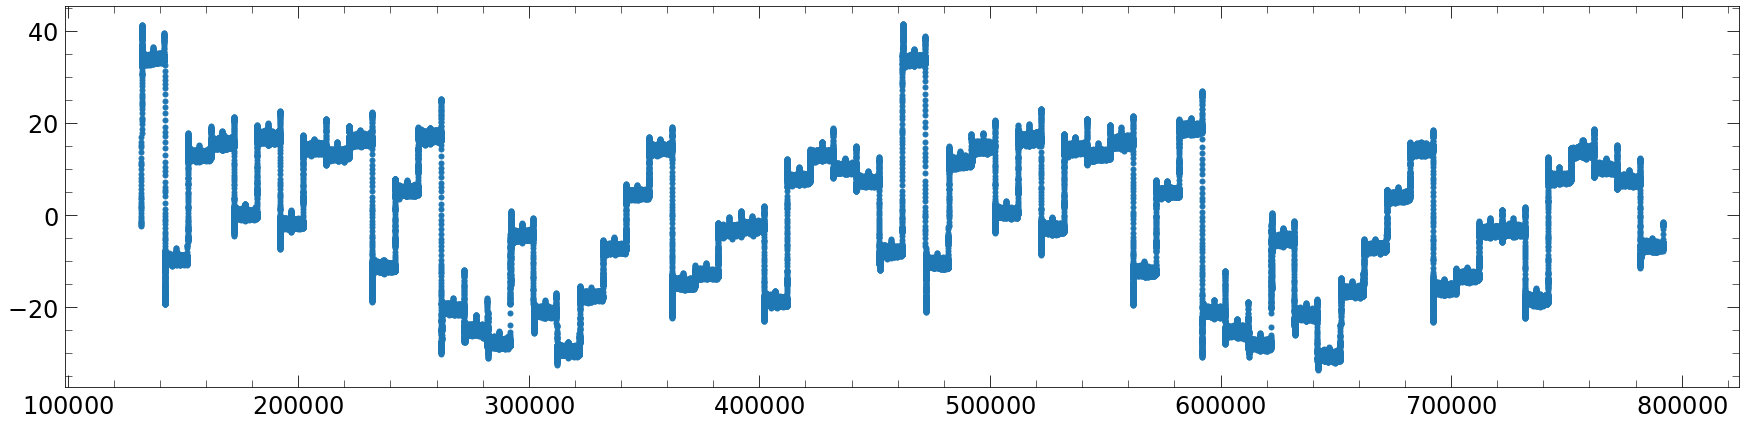

In [69]:
package_len = 10000
data_T = 40

chan_dict={}
for chan in range(33):
    chan_dict[str(chan)] = np.array([])

# cut_point = 28*10000+2000#  room T
cut_point = 13*10000+2000#  room T

sel_data = data[cut_point:cut_point+package_len*33*data_T]*1000# mv

all_useful_data = np.array([])
for index in range(0, data_T):

    select_data= sel_data[index*package_len*33:(index+1)*package_len*33]
    all_useful_data = np.concatenate((all_useful_data, select_data), axis=None)


    for chann in range(33):

        tmp_data = select_data[chann*package_len:(chann+1)*package_len] 
        result = np.append(tmp_data[1*int(package_len/10):4*int(package_len/10)],tmp_data[6*int(package_len/10):9*int(package_len/10)])
        
        array_index = chann % 33
        chan_dict[str(array_index)] = np.append(chan_dict[str(array_index)], result)


fig, ax = plt.subplots(figsize=(30, 7))
plt.plot( sel_data[0:66*package_len],'.')


In [70]:
sel_data_df = pd.DataFrame(chan_dict)
print(sel_data_df.shape)

(240000, 33)


In [71]:
# for i in range(0, len(sel_data_df), 6000):
#     new_df = sel_data_df.iloc[i:i+6000, 4]
#     # print(new_df)
#     print(new_df.std())

In [72]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # 加载数据
# # Assuming sel_data_df is already defined
# df = sel_data_df

# # 准备子图布局
# fig, axes = plt.subplots(7, 5, figsize=(26, 28))

# # 计算指定通道与其他通道的相关系数

# frist_channel = 2
# for selected_channel in range(33 - 1):
#     row, col = divmod(selected_channel, 5)
#     correlation_results = []
    
#     # 分段计算相关系数
#     for i in range(0, len(df), 6000):
#         segment_df = df.iloc[i:i+6000, :]
#         correlation_result = {
#             'Channel_1': df.columns[selected_channel],
#             'Channel_2': df.columns[frist_channel],
#             'Correlation': segment_df[df.columns[selected_channel]].corr(segment_df[df.columns[frist_channel]])
#         }
#         correlation_results.append(correlation_result)

#     # 转换为 DataFrame
#     correlation_df = pd.DataFrame(correlation_results)

#     mean_correlation = correlation_df['Correlation'].mean()
#     # 绘制直方图
#     axes[row, col].hist(correlation_df['Correlation'], color='skyblue', bins=20,label='mean: %0.2f'%mean_correlation)
#     # axes[row, col].set_xlim(-1, 1)
#     axes[row, col].set_title(f'Channel {frist_channel} with {selected_channel}')
#     axes[row, col].set_xlabel('Corr. Coef.')
#     axes[row, col].set_ylabel('Count')
#     axes[row, col].legend()

# # 调整子图布局
# plt.tight_layout()
# plt.show()


In [73]:
# import pandas as pd
# import matplotlib.pyplot as plt

# df = sel_data_df.loc[0:6000,:]



# # 准备子图布局
# fig, axes = plt.subplots(7, 5, figsize=(26, 20))
# # fig.subplots_adjust(hspace=0.5)

# # 计算指定通道与其他通道的相关系数
# for selected_channel in range(33 - 1):
#     row, col = divmod(selected_channel, 5)
    
#     all_correlation_results = []
#     for frist_channel in range(33-1):

#         correlation_results = []
#         # 分段计算相关系数
#         for i in range(0, len(df), 6000):
#             segment_df = df.iloc[i:i+6000, :]
#             correlation_result = {
#                 'Channel_1': df.columns[selected_channel],
#                 'Channel_2': df.columns[frist_channel],
#                 'Correlation': segment_df[df.columns[selected_channel]].corr(segment_df[df.columns[frist_channel]])
#             }
#             correlation_results.append(correlation_result)

#         # 转换为 DataFrame
#         correlation_df = pd.DataFrame(correlation_results)

#         mean_correlation = correlation_df['Correlation'].mean()

        
#         correlation_result = {
#             'Channel_1': df.columns[selected_channel],
#             'Channel_2': df.columns[frist_channel],
#             'Correlation': mean_correlation
#         }
#         all_correlation_results.append(correlation_result)

#     # 转换为 DataFrame
#     correlation_df = pd.DataFrame(all_correlation_results)


#     correlations = correlation_df['Correlation']
#     channel_pairs = [f"{ch1}-{ch2}" for ch1, ch2 in zip(correlation_df['Channel_1'], correlation_df['Channel_2'])]
#     # 绘制条形图
#     axes[row, col].bar(channel_pairs, correlations, color='skyblue')
#     axes[row, col].set_ylim(-0.05, 0.05)
#     axes[row, col].set_title(f'channel %s with others'%selected_channel)
#     # axes[row, col].set_xlabel('Channel Pairs')
#     # axes[row, col].set_ylabel('Correlation Coefficient')
#     # axes[row, col].set_xticks(rotation=65, ha='right')
#     labels = correlation_df['Channel_1'] + '-' + correlation_df['Channel_2']
#     axes[row, col].set_xticklabels(labels, rotation=65, ha='right',fontsize=8)

#     # plt.xticks(rotation=60, ha='right')

# # 调整子图布局
# plt.tight_layout()
# plt.show()


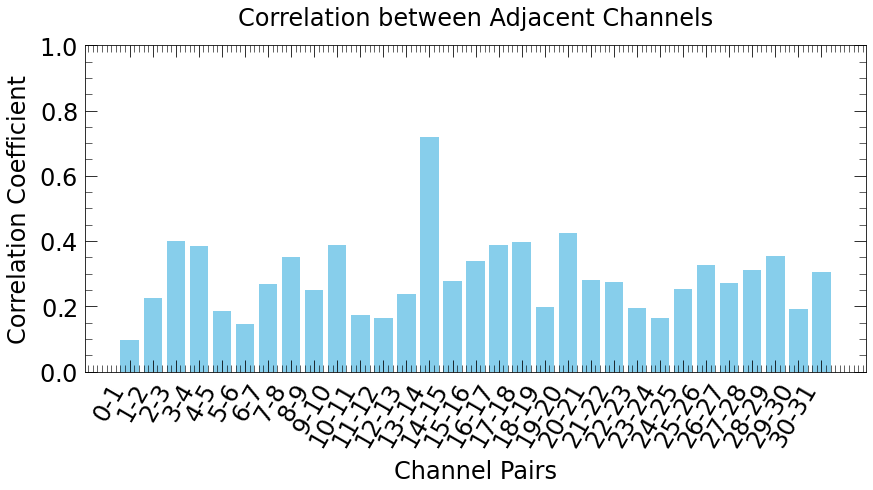

In [74]:
# 计算相邻两列的相关系数
correlation_results = []

for i in range(32 - 1):

    one_c = i
    correlation_result = {
        'Channel_1': sel_data_df.columns[one_c],
        'Channel_2': sel_data_df.columns[i + 1],
        'Correlation': sel_data_df[sel_data_df.columns[one_c]].corr(sel_data_df[sel_data_df.columns[i + 1]])
    }
    correlation_results.append(correlation_result)

# 转换为 DataFrame
correlation_df = pd.DataFrame(correlation_results)

# 绘制条形图
plt.figure(figsize=(14, 6))
plt.bar(correlation_df['Channel_1'] + '-' + correlation_df['Channel_2'], correlation_df['Correlation'], color='skyblue')
plt.ylim(0,1)
plt.title('Correlation between Adjacent Channels')
plt.xlabel('Channel Pairs')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=60, ha='right')
plt.show()


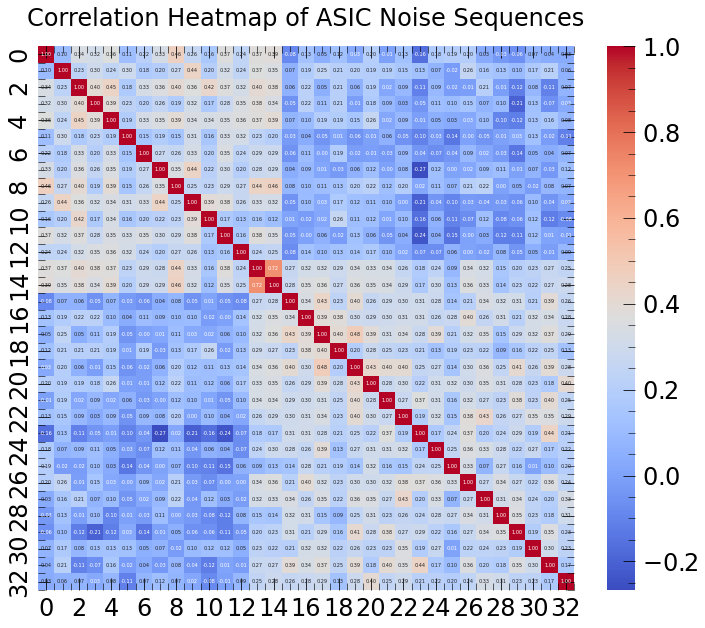

In [75]:
import seaborn as sns

corr_matrix = sel_data_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f",annot_kws={'fontsize': 5})
plt.title('Correlation Heatmap of ASIC Noise Sequences')
plt.show()

In [76]:
# plt.figure(figsize=(15, 12))
# from scipy.fft import fft, fftfreq
# for index in range(33):
#     # if 1>0:
#     if index == 0 or index == 30:
#     # if index == 31 or index == 32:
        

#         white_noise = chan_dict[str(index)][0:6000]


#         # 假设你有一个采样频率
#         sample_rate = 1e10 # 假设采样频率为10G

#         # 进行傅立叶变换
#         fft_result = fft(white_noise)
#         frequencies = fftfreq(len(white_noise), 1 / sample_rate)  # 考虑采样频率

#         # 取绝对值获取幅度谱
#         amplitude_spectrum = np.abs(fft_result)

#         # 只取频率的一半（正频率）
#         half_length = len(white_noise) // 2

#         half_length = 1000
#         frequencies = frequencies[:half_length]
#         amplitude_spectrum = amplitude_spectrum[:half_length]

#         # 绘制频率谱
#         plt.subplot(2, 1, 1)
#         print(np.std(white_noise))
#         plt.plot(white_noise,label='channel %s'%(index+1))
#         plt.title('Original Signal')
#         plt.legend()


#         plt.subplot(2, 1, 2)
#         plt.plot(frequencies, amplitude_spectrum,label='channel %s'%(index+1))
#         # print(frequencies[0:5])
#         # print(amplitude_spectrum[0:5])


# plt.legend()
# plt.title('Frequency Spectrum of Noise')
# plt.xlabel('Frequency (Hz)')  # 将x轴单位设置为Hz
# plt.ylabel('Amplitude')
# plt.yscale('log')
# # plt.xlim(0,1e4)
# plt.grid()
# plt.tight_layout()
# plt.show()

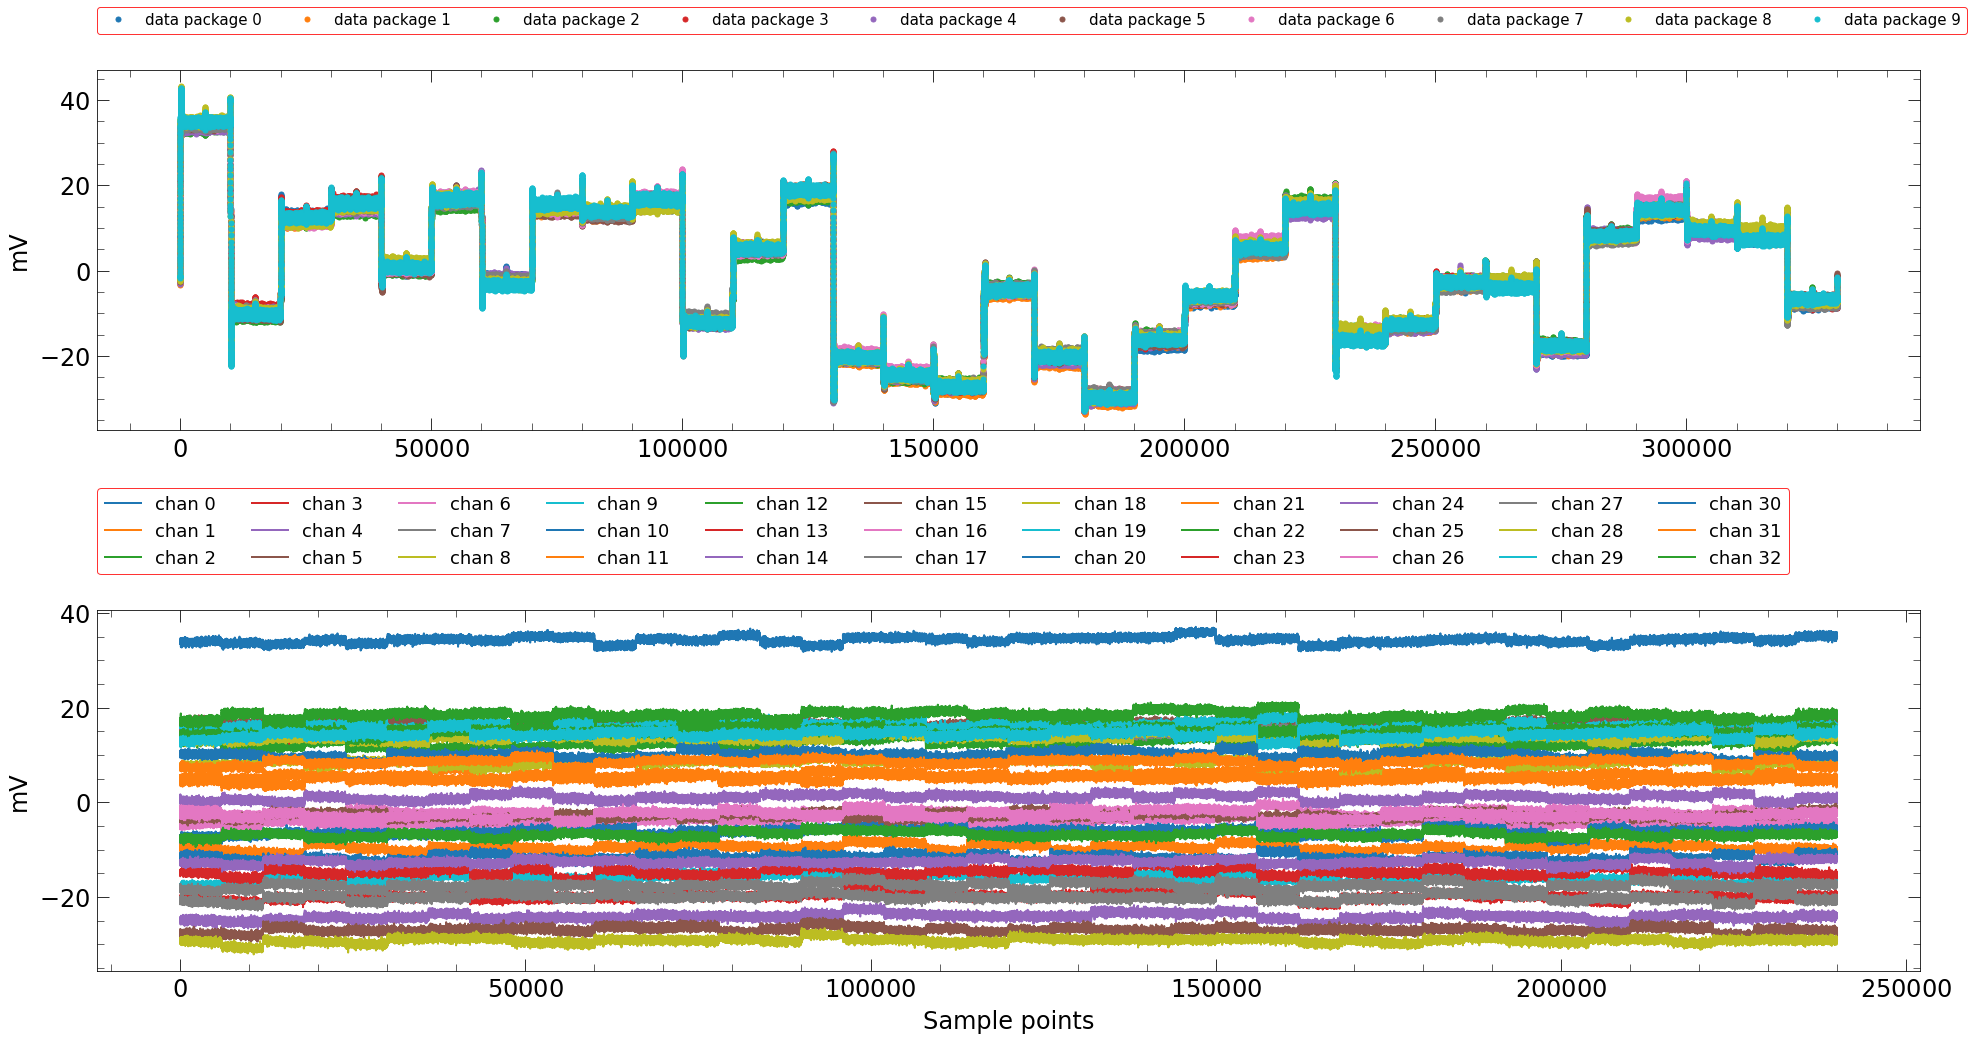

In [77]:
fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(30, 15))
dis_chan_range = [0,33]
for n in range(0,10):
    ax[0].plot(all_useful_data[dis_chan_range[0]*package_len+33*package_len*n:dis_chan_range[1]*package_len+33*package_len*n],\
               '.',label="data package %s"%n)

for index in range(33):
    # if index == 31 or index == 32:
    ax[1].plot(chan_dict[str(index)],label='chan %s'%index)
    # print(np.std(chan_dict[str(index)]))

ax[1].set_xlabel("Sample points")
ax[0].set_ylabel("mV")
ax[1].set_ylabel("mV")
# ax.set_ylim(550,675)
ax[0].legend(frameon=True, edgecolor='red',fontsize=15,loc=[0.0,1.1],ncol=11)
ax[1].legend(frameon=True, edgecolor='red',fontsize=18,loc=[0.0,1.1],ncol=11)
plt.tight_layout()
plt.savefig("../plots/waveform_display.pdf")

/dybfs2/nEXO/fuys/software/anaconda3/envs/cpu_root/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator


['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']
[321.59, 318.32, 386.63, 329.95, 328.26, 352.91, 303.86, 375.37, 297.07, 362.89, 275.44, 290.85, 368.76, 318.92, 325.08, 276.76, 303.88, 333.41, 265.79, 332.89, 304.65, 340.23, 321.69, 348.67, 256.33, 285.19, 334.97, 304.73, 315.29, 356.41, 315.59, 288.36]


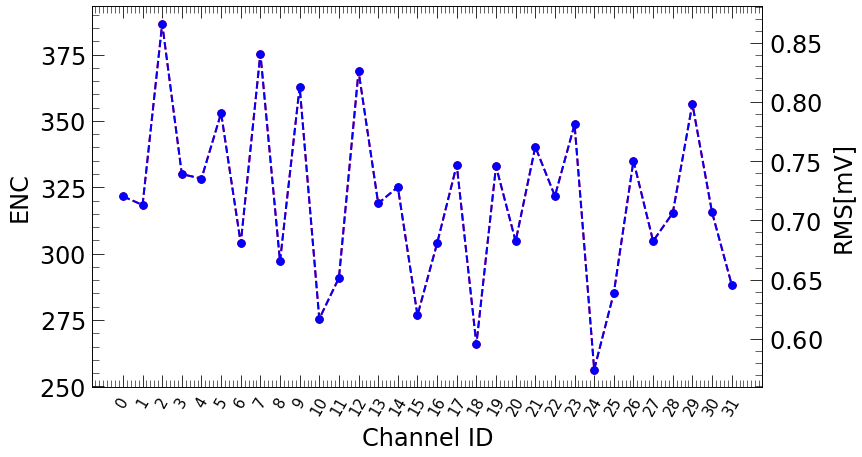

In [78]:
chan_index=[]
ENC_value=[]
Vstd_value=[]
for index, value in chan_dict.items():
    # value = value[50:100]
    # print("std",np.std(value))
    chan_index.append(index)
    ENC_value.append(np.std(value)/14*6250)
    Vstd_value.append(np.std(value))
    # print("Chan: %s V std %0.2f"%(index,np.std(value)))
    # print("ENC",np.std(value)/14*6250)

fig, ax = plt.subplots(figsize=(12, 7))
ax2 = ax.twinx()
ax2.plot(chan_index[0:-1], Vstd_value[0:-1],'.b--',markersize=15)
ax2.set_ylabel("RMS[mV]")

ax.plot(chan_index[0:-1], ENC_value[0:-1],'.r--',markersize=15)
ax.set_xlabel("Channel ID")
ax.set_ylabel("ENC")
# ax.set_ylim(220,550)
# ax2.set_ylim(0.5,1.2)
ax.set_xticklabels(labels=chan_index,rotation=60,size=15)
plt.savefig("../plots/ENC_results.pdf")

print(chan_index[:-1])
print([round(num, 2) for num in ENC_value[:-1]])